In [1]:
import tensorflow as tf
import numpy as np
import random

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
# Only need '%matplotlib inline' when running in ipython notebook.
import matplotlib.pyplot as plt

In [2]:
def get_data(set_type):
    """Get data from files and storage them in a array. Return the data_set and label_set.
    
    set_type    the type of data set you want to build, including train dataset, dev dataset 
                and eval dataset
    """
    
    data_path = {'train': 'train/lab/hw1train_labels.txt', 'dev': 'dev/lab/hw1dev_labels.txt', \
                 'eval': 'eval/lab/hw1eval_labels.txt'} 

    label_array = np.loadtxt(data_path[set_type], dtype='string')

    #creat empty arrays to insert label and data
    label_set = np.zeros([len(label_array), 2])
    data_set = np.zeros([len(label_array), 16])

    #the first column of the label file is the label,
    #the second column is the corresbonding data file nam
    for i in range(len(label_set)): 
        
        #build the label set
        if int(label_array[i][0]) == 0:
            label_set[i][0] = 1 #insert label into label_set
        else:
            label_set[i][1] = 1
            
        #build the data set
        with open(label_array[i][1]) as data_file:
            data = data_file.readlines()[0].split() #find the data accoding to label
        for j in range(len(data)):
            data_set[i][j] = data[j] #insert data into the dataset
            
    data_set, label_set = nan_check(data_set, label_set) #delete the rows containing 'nan'
    
    return data_set, label_set #return the data set and label set


In [3]:
def nan_check(data, label):
    """Find out the rows in datasets and delete these rows
    
    """
    
    nan_rows = np.array(0); #define an array containg the no. of rows having 'nan'
    
    #collect all the numbers of 'nan'-data rows
    for i in range(len(data)):
        for j in range(16):
            if str(data[i][j]) == 'nan':
                nan_rows = np.append(nan_rows, i)
    nan_rows = np.delete(nan_rows, 0) #delete the first element of nan_rows which was made to fit the append()
    
    return np.delete(data, nan_rows, 0), np.delete(label, nan_rows, 0) #output the dataset whose 'nan'-data rows have been deleted


In [4]:
def shuffle(data_set, label_set):
    """Randomly shuffle the data and label
    
    data_set    the data samples
    
    label_set   the lables
    """
    
    shuffled_data = np.zeros((data_set.shape))
    shuffled_label = np.zeros((label_set.shape))
    idx = np.array(xrange(len(label_set)))
    random.shuffle(idx)
    i = 0
    for j in idx:
        shuffled_data[i] = data_set[int(j)]
        shuffled_label[i] = label_set[int(j)]
        i += 1
    return shuffled_data, shuffled_label

In [7]:
train_data, train_label = get_data('train')
train_data, train_label = shuffle(train_data, train_label)
print train_data.shape, train_label.shape


(8774, 16) (8774, 2)


In [8]:
x_placeholder = tf.placeholder(tf.float32, [None, 16])
y_placeholder = tf.placeholder(tf.float32, [None, 2])
w = tf.Variable(tf.random_normal([16, 2]))
b = tf.Variable(tf.zeros([2]))
y_hat = tf.nn.softmax(tf.matmul(x_placeholder, w) + b)

#loss = tf.reduce_sum(tf.square(y_placeholder-y_hat)) / train_data.shape[0]
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_placeholder * tf.log(y_hat), reduction_indices=[1]))
correct_prediction = tf.equal(tf.argmax(y_hat,1), tf.argmax(y_placeholder,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

y_error = []

for step in range(6000):
    feed_dict = {x_placeholder: train_data, y_placeholder: train_label}
    sess.run(train_step, feed_dict=feed_dict)
    loss_np = sess.run(cross_entropy, feed_dict=feed_dict)
    
    if step % 60 == 0:
        print("Loss at step %d: %f" % (step, loss_np))
        print(sess.run(accuracy, feed_dict={x_placeholder: train_data, y_placeholder: train_label}))
        y_error.append(loss_np)
print sess.run(w)


Loss at step 0: 1.603665
0.648849
Loss at step 60: 1.136071
0.688511
Loss at step 120: 0.817993
0.737064
Loss at step 180: 0.597623
0.788694
Loss at step 240: 0.455304
0.831548
Loss at step 300: 0.367535
0.862093
Loss at step 360: 0.314238
0.88295
Loss at step 420: 0.281918
0.895943
Loss at step 480: 0.262282
0.903009
Loss at step 540: 0.250210
0.908708
Loss at step 600: 0.242545
0.91338
Loss at step 660: 0.237406
0.916116
Loss at step 720: 0.233723
0.918053
Loss at step 780: 0.230909
0.919763
Loss at step 840: 0.228641
0.922384
Loss at step 900: 0.226739
0.923068
Loss at step 960: 0.225099
0.92341
Loss at step 1020: 0.223656
0.92455
Loss at step 1080: 0.222368
0.92569
Loss at step 1140: 0.221205
0.92569
Loss at step 1200: 0.220146
0.926259
Loss at step 1260: 0.219174
0.926487
Loss at step 1320: 0.218277
0.926829
Loss at step 1380: 0.217446
0.927399
Loss at step 1440: 0.216672
0.927855
Loss at step 1500: 0.215949
0.927855
Loss at step 1560: 0.215270
0.927855
Loss at step 1620: 0.214632

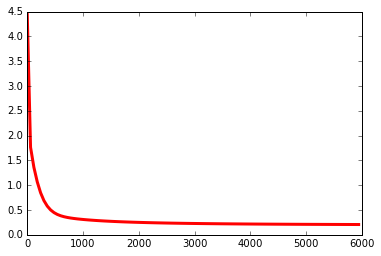

In [184]:

x_axis = np.arange(0, 6000, 60)

plt.plot(x_axis, y_error,'r', linewidth=3)